In [1]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Or choose another style from plt.style.available

In [3]:
import seaborn as sns
sns.set_style('darkgrid')  # or any other seaborn style

In [4]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import datetime as dt
from statsmodels.tsa.stattools import adfuller
import plotly.offline as pyoff
import plotly.graph_objs as go

# Check if 'seaborn-darkgrid' is available, otherwise use 'ggplot'
import matplotlib
available_styles = plt.style.available
if 'seaborn-darkgrid' in available_styles:
    matplotlib.style.use('seaborn-darkgrid')
else:
    matplotlib.style.use('ggplot')

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


#Importing complete wind and solar energy  data for 2015- 2021 Germany

In [5]:
df = pd.read_csv("/Users/arunkumaraluru/Desktop/project code/capstone project/SOLAR-AND-WIND-ENERGY-PREDICTION-main/time_series_60min_singleindex_filtered.csv", parse_dates=[0], index_col=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50401 entries, 2014-12-31 23:00:00+00:00 to 2020-09-30 23:00:00+00:00
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   cet_cest_timestamp                    50401 non-null  object 
 1   DE_load_actual_entsoe_transparency    50400 non-null  float64
 2   DE_load_forecast_entsoe_transparency  50376 non-null  float64
 3   DE_solar_capacity                     43800 non-null  float64
 4   DE_solar_generation_actual            50297 non-null  float64
 5   DE_solar_profile                      43696 non-null  float64
 6   DE_wind_capacity                      43800 non-null  float64
 7   DE_wind_generation_actual             50326 non-null  float64
 8   DE_wind_profile                       43725 non-null  float64
 9   DE_wind_offshore_capacity             43800 non-null  float64
 10  DE_wind_offshore_generation_actual 

In [7]:
#display rows which have null values in "wind generation actual"
df[df['DE_wind_generation_actual'].isna()]

cet_cest_timestamp  \
utc_timestamp                                         
2014-12-31 23:00:00+00:00  2015-01-01T00:00:00+0100   
2016-05-31 21:00:00+00:00  2016-05-31T23:00:00+0200   
2016-05-31 22:00:00+00:00  2016-06-01T00:00:00+0200   
2016-05-31 23:00:00+00:00  2016-06-01T01:00:00+0200   
2016-06-01 00:00:00+00:00  2016-06-01T02:00:00+0200   
...                                             ...   
2016-12-09 18:00:00+00:00  2016-12-09T19:00:00+0100   
2016-12-09 19:00:00+00:00  2016-12-09T20:00:00+0100   
2016-12-09 20:00:00+00:00  2016-12-09T21:00:00+0100   
2016-12-09 21:00:00+00:00  2016-12-09T22:00:00+0100   
2016-12-09 22:00:00+00:00  2016-12-09T23:00:00+0100   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2016-05-31 21:00:00+00:00                             49286.0   
2016-05-31 22:00:00+00:00                             45570.0   
2016-05-31 23:00:00+00:00                             43906.0   
2016-06-01 00:00:00+00:00                             43059.0   
...                                                       ...   
2016-12-09 18:00:00+00:00                             67805.0   
2016-12-09 19:00:00+00:00                             63626.0   
2016-12-09 20:00:00+00:00                             59988.0   
2016-12-09 21:00:00+00:00                             57554.0   
2016-12-09 22:00:00+00:00                             53978.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2016-05-31 21:00:00+00:00                               47884.0   
2016-05-31 22:00:00+00:00                               44767.0   
2016-05-31 23:00:00+00:00                               42865.0   
2016-06-01 00:00:00+00:00                               41763.0   
...                                                         ...   
2016-12-09 18:00:00+00:00                               68936.0   
2016-12-09 19:00:00+00:00                               65169.0   
2016-12-09 20:00:00+00:00                               61899.0   
2016-12-09 21:00:00+00:00                               59608.0   
2016-12-09 22:00:00+00:00                               55101.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         NaN   
2016-05-31 21:00:00+00:00            38989.0                         NaN   
2016-05-31 22:00:00+00:00            38991.0                         NaN   
2016-05-31 23:00:00+00:00            38991.0                         NaN   
2016-06-01 00:00:00+00:00            38991.0                         NaN   
...                                      ...                         ...   
2016-12-09 18:00:00+00:00            39699.0                         NaN   
2016-12-09 19:00:00+00:00            39699.0                         NaN   
2016-12-09 20:00:00+00:00            39699.0                         NaN   
2016-12-09 21:00:00+00:00            39699.0                         NaN   
2016-12-09 22:00:00+00:00            39699.0                         NaN   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               NaN           27913.0   
2016-05-31 21:00:00+00:00               NaN           34217.0   
2016-05-31 22:00:00+00:00               NaN           34238.0   
2016-05-31 23:00:00+00:00               NaN           34238.0   
2016-06-01 00:00:00+00:00               NaN           34238.0   
...                                     ...               ...   
2016-12-09 18:00:00+00:00               NaN           36538.0   
2016-12-09 19:00:00+00:00

In [8]:
df[df['DE_solar_generation_actual'].isna()]  #display rows which have null values in "solar generation actual"

cet_cest_timestamp  \
utc_timestamp                                         
2014-12-31 23:00:00+00:00  2015-01-01T00:00:00+0100   
2015-01-01 00:00:00+00:00  2015-01-01T01:00:00+0100   
2015-01-01 01:00:00+00:00  2015-01-01T02:00:00+0100   
2015-01-01 02:00:00+00:00  2015-01-01T03:00:00+0100   
2015-01-01 03:00:00+00:00  2015-01-01T04:00:00+0100   
...                                             ...   
2016-12-09 18:00:00+00:00  2016-12-09T19:00:00+0100   
2016-12-09 19:00:00+00:00  2016-12-09T20:00:00+0100   
2016-12-09 20:00:00+00:00  2016-12-09T21:00:00+0100   
2016-12-09 21:00:00+00:00  2016-12-09T22:00:00+0100   
2016-12-09 22:00:00+00:00  2016-12-09T23:00:00+0100   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   
...                                                       ...   
2016-12-09 18:00:00+00:00                             67805.0   
2016-12-09 19:00:00+00:00                             63626.0   
2016-12-09 20:00:00+00:00                             59988.0   
2016-12-09 21:00:00+00:00                             57554.0   
2016-12-09 22:00:00+00:00                             53978.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2015-01-01 00:00:00+00:00                               39723.0   
2015-01-01 01:00:00+00:00                               38813.0   
2015-01-01 02:00:00+00:00                               38490.0   
2015-01-01 03:00:00+00:00                               38644.0   
...                                                         ...   
2016-12-09 18:00:00+00:00                               68936.0   
2016-12-09 19:00:00+00:00                               65169.0   
2016-12-09 20:00:00+00:00                               61899.0   
2016-12-09 21:00:00+00:00                               59608.0   
2016-12-09 22:00:00+00:00                               55101.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         NaN   
2015-01-01 00:00:00+00:00            37248.0                         NaN   
2015-01-01 01:00:00+00:00            37248.0                         NaN   
2015-01-01 02:00:00+00:00            37248.0                         NaN   
2015-01-01 03:00:00+00:00            37248.0                         NaN   
...                                      ...                         ...   
2016-12-09 18:00:00+00:00            39699.0                         NaN   
2016-12-09 19:00:00+00:00            39699.0                         NaN   
2016-12-09 20:00:00+00:00            39699.0                         NaN   
2016-12-09 21:00:00+00:00            39699.0                         NaN   
2016-12-09 22:00:00+00:00            39699.0                         NaN   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               NaN           27913.0   
2015-01-01 00:00:00+00:00               NaN           27913.0   
2015-01-01 01:00:00+00:00               NaN           27913.0   
2015-01-01 02:00:00+00:00               NaN           27913.0   
2015-01-01 03:00:00+00:00               NaN           27913.0   
...                                     ...               ...   
2016-12-09 18:00:00+00:00               NaN           36538.0   
2016-12-09 19:00:00+00:00

In [9]:
df.isna().sum()   #75 null values for wind_gen_actual #104 null values for solar_gen_actual 

cet_cest_timestamp                         0
DE_load_actual_entsoe_transparency         1
DE_load_forecast_entsoe_transparency      25
DE_solar_capacity                       6601
DE_solar_generation_actual               104
DE_solar_profile                        6705
DE_wind_capacity                        6601
DE_wind_generation_actual                 75
DE_wind_profile                         6676
DE_wind_offshore_capacity               6601
DE_wind_offshore_generation_actual        75
DE_wind_offshore_profile                6676
DE_wind_onshore_capacity                6601
DE_wind_onshore_generation_actual         73
DE_wind_onshore_profile                 6674
dtype: int64

#Filling null values from the values of the day before 


In [10]:
nulls = df.isna().any(axis=1)
df.loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_solar_generation_actual','cet_cest_timestamp']]

#shift function to shift the index 24 hours

#Rechecking the null values (whatever left)

In [11]:
df[df['DE_solar_generation_actual'].isna()]

cet_cest_timestamp  \
utc_timestamp                                  
2014-12-31 23:00:00+00:00               None   
2015-01-01 00:00:00+00:00               None   
2015-01-01 01:00:00+00:00               None   
2015-01-01 02:00:00+00:00               None   
2015-01-01 03:00:00+00:00               None   
2015-01-01 04:00:00+00:00               None   
2015-01-01 05:00:00+00:00               None   
2015-01-01 06:00:00+00:00               None   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   
2015-01-01 04:00:00+00:00                             38941.0   
2015-01-01 05:00:00+00:00                             39045.0   
2015-01-01 06:00:00+00:00                             40206.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2015-01-01 00:00:00+00:00                               39723.0   
2015-01-01 01:00:00+00:00                               38813.0   
2015-01-01 02:00:00+00:00                               38490.0   
2015-01-01 03:00:00+00:00                               38644.0   
2015-01-01 04:00:00+00:00                               38773.0   
2015-01-01 05:00:00+00:00                               37247.0   
2015-01-01 06:00:00+00:00                               40371.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         NaN   
2015-01-01 00:00:00+00:00            37248.0                         NaN   
2015-01-01 01:00:00+00:00            37248.0                         NaN   
2015-01-01 02:00:00+00:00            37248.0                         NaN   
2015-01-01 03:00:00+00:00            37248.0                         NaN   
2015-01-01 04:00:00+00:00            37248.0                         NaN   
2015-01-01 05:00:00+00:00            37248.0                         NaN   
2015-01-01 06:00:00+00:00            37248.0                         NaN   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               NaN           27913.0   
2015-01-01 00:00:00+00:00               NaN           27913.0   
2015-01-01 01:00:00+00:00               NaN           27913.0   
2015-01-01 02:00:00+00:00               NaN           27913.0   
2015-01-01 03:00:00+00:00               NaN           27913.0   
2015-01-01 04:00:00+00:00               NaN           27913.0   
2015-01-01 05:00:00+00:00               NaN           27913.0   
2015-01-01 06:00:00+00:00               NaN           27913.0   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00                        NaN              NaN   
2015-01-01 00:00:00+00:00                     8852.0           0.3171   
2015-01-01 01:00:00+00:00                     9054.0           0.3244   
2015-01-01 02:00:00+00:00                     9070.0           0.3249   
2015-01-01 03:00:00+00:00                     9163.0           0.3283   
2015-01-01 04:00:00+00:00                     9231.0           0.3307   
2015-01-01 05:00:00+00:00                     9689.0           0.3471   
2015-01-01 06:00:00+00:00                    10331.0           0.3701   

                           DE_wind_offshore_capacity  \
utc_timestamp           

Observation --> The only remaining null values left are the ones that were from the first day because we filled in the rest of the null values from the day before.

In [12]:
#fill in the rest to zero because that is what they would be at those hours of night till 6 am
df['DE_solar_generation_actual'].fillna(0, inplace = True)
df['cet_cest_timestamp'].fillna(0, inplace = True) 

####Repeating the same for wind energy

In [13]:
nulls =df.isna().any(axis=1)
df.loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']] = df.shift(24).loc[nulls, ['DE_wind_generation_actual','cet_cest_timestamp']]



####Replacing the null values (whatever left) by mean



In [14]:
df[df['DE_wind_generation_actual'].isna()]

cet_cest_timestamp  \
utc_timestamp                                  
2014-12-31 23:00:00+00:00               None   
2015-01-01 00:00:00+00:00               None   
2015-01-01 01:00:00+00:00               None   
2015-01-01 02:00:00+00:00               None   
2015-01-01 03:00:00+00:00               None   
2015-01-01 04:00:00+00:00               None   
2015-01-01 05:00:00+00:00               None   
2015-01-01 06:00:00+00:00               None   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   
2015-01-01 04:00:00+00:00                             38941.0   
2015-01-01 05:00:00+00:00                             39045.0   
2015-01-01 06:00:00+00:00                             40206.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2015-01-01 00:00:00+00:00                               39723.0   
2015-01-01 01:00:00+00:00                               38813.0   
2015-01-01 02:00:00+00:00                               38490.0   
2015-01-01 03:00:00+00:00                               38644.0   
2015-01-01 04:00:00+00:00                               38773.0   
2015-01-01 05:00:00+00:00                               37247.0   
2015-01-01 06:00:00+00:00                               40371.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         0.0   
2015-01-01 00:00:00+00:00            37248.0                         0.0   
2015-01-01 01:00:00+00:00            37248.0                         0.0   
2015-01-01 02:00:00+00:00            37248.0                         0.0   
2015-01-01 03:00:00+00:00            37248.0                         0.0   
2015-01-01 04:00:00+00:00            37248.0                         0.0   
2015-01-01 05:00:00+00:00            37248.0                         0.0   
2015-01-01 06:00:00+00:00            37248.0                         0.0   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               NaN           27913.0   
2015-01-01 00:00:00+00:00               NaN           27913.0   
2015-01-01 01:00:00+00:00               NaN           27913.0   
2015-01-01 02:00:00+00:00               NaN           27913.0   
2015-01-01 03:00:00+00:00               NaN           27913.0   
2015-01-01 04:00:00+00:00               NaN           27913.0   
2015-01-01 05:00:00+00:00               NaN           27913.0   
2015-01-01 06:00:00+00:00               NaN           27913.0   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00                        NaN              NaN   
2015-01-01 00:00:00+00:00                        NaN           0.3171   
2015-01-01 01:00:00+00:00                        NaN           0.3244   
2015-01-01 02:00:00+00:00                        NaN           0.3249   
2015-01-01 03:00:00+00:00                        NaN           0.3283   
2015-01-01 04:00:00+00:00                        NaN           0.3307   
2015-01-01 05:00:00+00:00                        NaN           0.3471   
2015-01-01 06:00:00+00:00                        NaN           0.3701   

                           DE_wind_offshore_capacity  \
utc_timestamp           

In [15]:
df['DE_wind_generation_actual'].mean()

11556.499335225131

In [16]:
df['DE_wind_generation_actual'].fillna(11556, inplace=True)

In [17]:
df.isna().sum()

cet_cest_timestamp                         8
DE_load_actual_entsoe_transparency         1
DE_load_forecast_entsoe_transparency      25
DE_solar_capacity                       6601
DE_solar_generation_actual                 0
DE_solar_profile                        6705
DE_wind_capacity                        6601
DE_wind_generation_actual                  0
DE_wind_profile                         6676
DE_wind_offshore_capacity               6601
DE_wind_offshore_generation_actual        75
DE_wind_offshore_profile                6676
DE_wind_onshore_capacity                6601
DE_wind_onshore_generation_actual         73
DE_wind_onshore_profile                 6674
dtype: int64

#HEAT MAP TO CHECK CORRELATIONS BETWEEN FEATURES

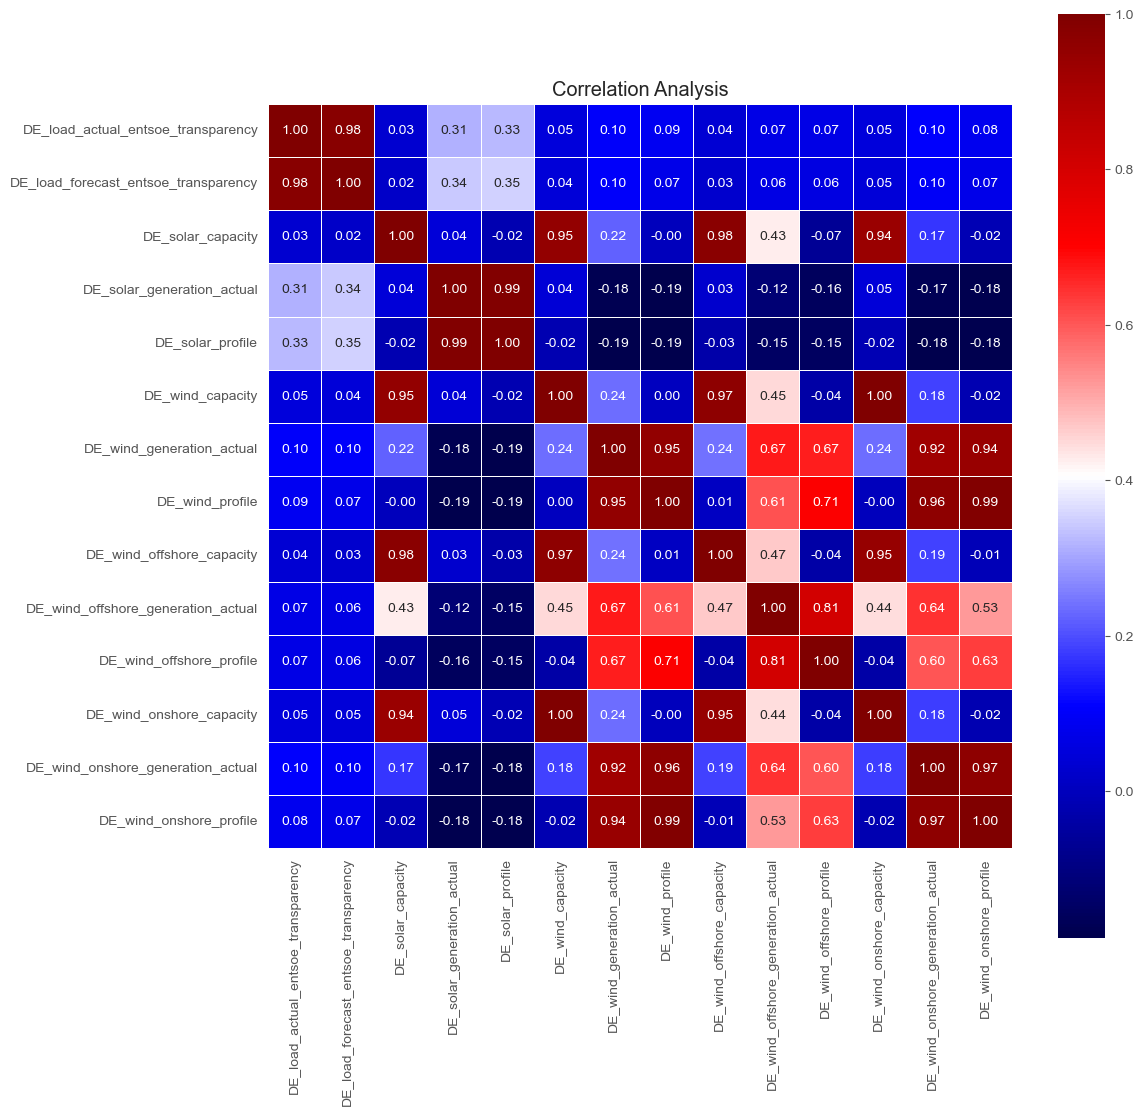

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Create the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=numeric_df.corr(),
            annot=True,
            annot_kws={"size": 10},
            square=True,
            cmap='seismic',
            fmt='.2f',
            linewidths=0.5,
            linecolor='w',
            ax=ax)
plt.title('Correlation Analysis')
plt.show()


solar_generation_actual depends most on solar_profile

wind_generation-actual depends most on wind_profile, wind_onshore_profile, wind_onshore_generation and  then on wind_offshore_profile and wind_offshore_generation 

#dataset with timestamps as features (used later for time series forecasting models)

In [19]:
modified=df[['cet_cest_timestamp', 'DE_solar_generation_actual','DE_wind_generation_actual']]
modified

cet_cest_timestamp  \
utc_timestamp                                         
2014-12-31 23:00:00+00:00                      None   
2015-01-01 00:00:00+00:00                      None   
2015-01-01 01:00:00+00:00                      None   
2015-01-01 02:00:00+00:00                      None   
2015-01-01 03:00:00+00:00                      None   
...                                             ...   
2020-09-30 19:00:00+00:00  2020-09-28T21:00:00+0200   
2020-09-30 20:00:00+00:00  2020-09-28T22:00:00+0200   
2020-09-30 21:00:00+00:00  2020-09-28T23:00:00+0200   
2020-09-30 22:00:00+00:00  2020-09-29T00:00:00+0200   
2020-09-30 23:00:00+00:00  2020-09-29T01:00:00+0200   

                           DE_solar_generation_actual  \
utc_timestamp                                           
2014-12-31 23:00:00+00:00                         0.0   
2015-01-01 00:00:00+00:00                         0.0   
2015-01-01 01:00:00+00:00                         0.0   
2015-01-01 02:00:00+00:00                         0.0   
2015-01-01 03:00:00+00:00                         0.0   
...                                               ...   
2020-09-30 19:00:00+00:00                         0.0   
2020-09-30 20:00:00+00:00                         0.0   
2020-09-30 21:00:00+00:00                         0.0   
2020-09-30 22:00:00+00:00                         0.0   
2020-09-30 23:00:00+00:00                         0.0   

                           DE_wind_generation_actual  
utc_timestamp                                         
2014-12-31 23:00:00+00:00                    11556.0  
2015-01-01 00:00:00+00:00                    11556.0  
2015-01-01 01:00:00+00:00                    11556.0  
2015-01-01 02:00:00+00:00                    11556.0  
2015-01-01 03:00:00+00:00                    11556.0  
...                                              ...  
2020-09-30 19:00:00+00:00                     2516.0  
2020-09-30 20:00:00+00:00                     2180.0  
2020-09-30 21:00:00+00:00                     1834.0  
2020-09-30 22:00:00+00:00                     1722.0  
2020-09-30 23:00:00+00:00                     1535.0  

[50401 rows x 3 columns]

In [ ]:
#modified dataset
# energy_all = pd.read_csv("time_series_60min_singleindex_filtered (3).csv",
#                         parse_dates=[0], index_col=0)

The only remaining null values left are the ones that were from the first day because we filled in the rest of the null values from the day before. We see that it that it also turned the dummy column, cet_cest_timestamp, into nulls at the same location. This is why I used it as dummy column.

In [ ]:
# Drop the column becasue we do not need another time column
modified.drop(columns='cet_cest_timestamp',inplace=True)

# EDA

##Histograms for solar_generation_actual and wind_generation_actual 

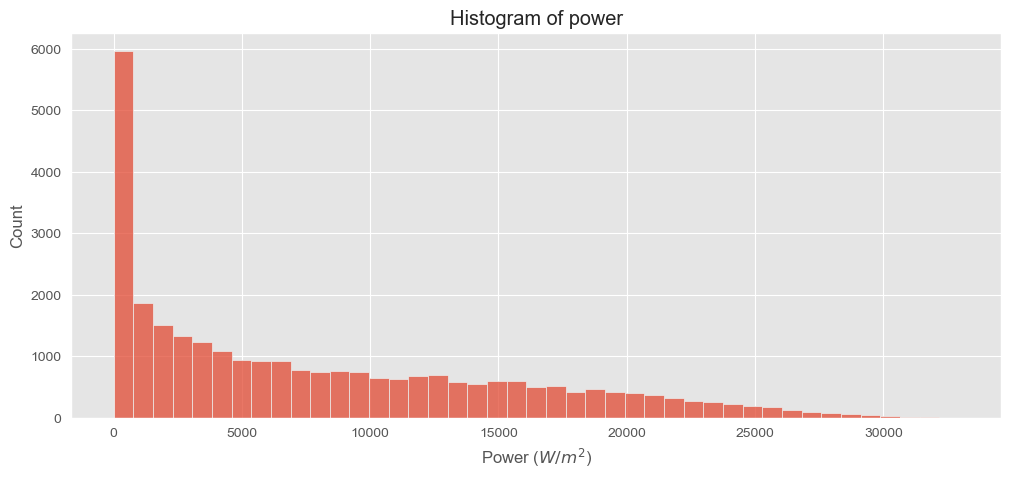

In [22]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['DE_solar_generation_actual'] != 0].DE_solar_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

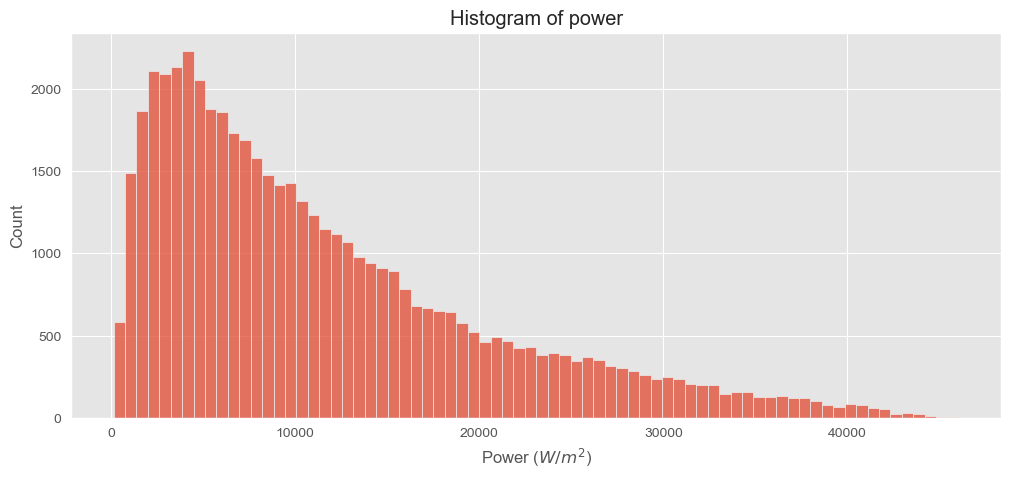

In [23]:
plt.figure(figsize=(12, 5))
sns.histplot(df[df['DE_wind_generation_actual'] != 0].DE_wind_generation_actual)  # remove all 0 in histogram
plt.title('Histogram of power')
plt.xlabel('Power ($W/m^2$)')
plt.show()

In [24]:
# We will create a new data frame so that we can make the appropriate boxplots. 
DE_energy = modified.reset_index()
DE_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   utc_timestamp               50401 non-null  datetime64[ns, UTC]
 1   DE_solar_generation_actual  50401 non-null  float64            
 2   DE_wind_generation_actual   50401 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2)
memory usage: 1.2 MB


In [25]:
# create utc_timestamp as a column and another hour column
DE_energy['utc_timestamp'] = pd.to_datetime(DE_energy['utc_timestamp']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))

DE_energy['utc_timestamp']=pd.to_datetime(DE_energy['utc_timestamp'])
DE_energy['hour'] = DE_energy['utc_timestamp'].dt.hour

## boxplot of energy output vs the hour at which recorded (useful for time series forecast)

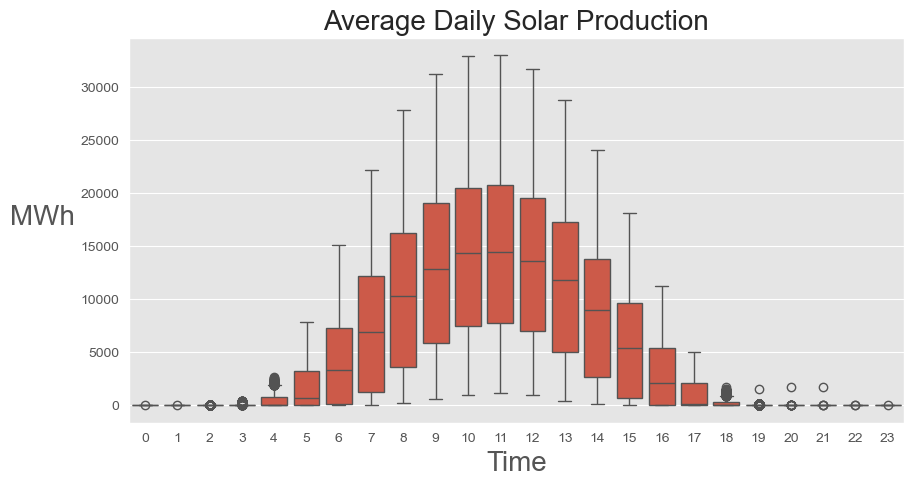

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of the average solar generation production
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='DE_solar_generation_actual', data=DE_energy)

plt.title('Average Daily Solar Production', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel("MWh", rotation=0, ha='right', fontsize=20)
plt.show()


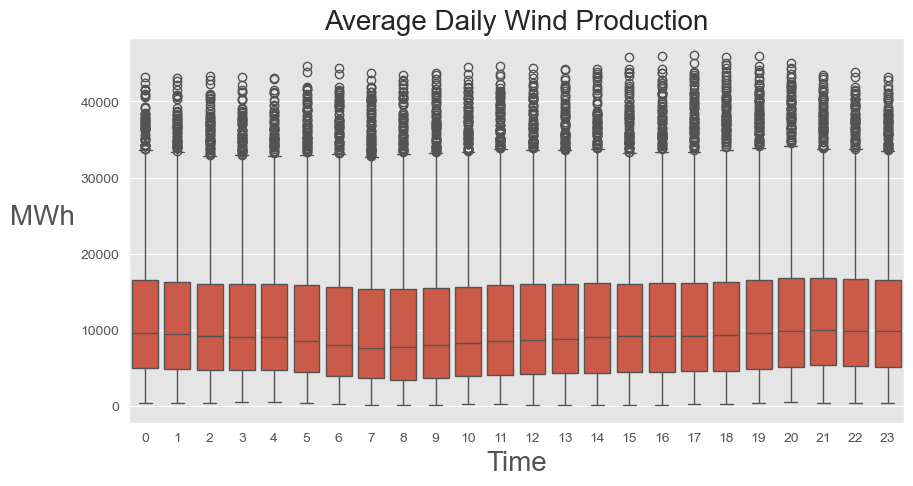

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of the average wind generation production
plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='DE_wind_generation_actual', data=DE_energy)

plt.title('Average Daily Wind Production', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel("MWh", rotation=0, ha='right', fontsize=20)
plt.show()


Wind appears to not differ as much during the day as solar.The time of day does affect wind speed with surface temperatures increasing, however it is not shown in this plot.

We can use mean over all the days to get a better time series analysis with less noise.

In [28]:
# use the resample function to average the generation over all the days
modified = modified.resample('D').mean()
modified

DE_solar_generation_actual  \
utc_timestamp                                           
2014-12-31 00:00:00+00:00                    0.000000   
2015-01-01 00:00:00+00:00                  712.416667   
2015-01-02 00:00:00+00:00                  323.208333   
2015-01-03 00:00:00+00:00                  301.541667   
2015-01-04 00:00:00+00:00                  832.583333   
...                                               ...   
2020-09-26 00:00:00+00:00                 2713.125000   
2020-09-27 00:00:00+00:00                 1527.083333   
2020-09-28 00:00:00+00:00                 4035.666667   
2020-09-29 00:00:00+00:00                 4656.791667   
2020-09-30 00:00:00+00:00                 3706.958333   

                           DE_wind_generation_actual  
utc_timestamp                                         
2014-12-31 00:00:00+00:00               11556.000000  
2015-01-01 00:00:00+00:00               14194.458333  
2015-01-02 00:00:00+00:00               25148.083333  
2015-01-03 00:00:00+00:00               19289.791667  
2015-01-04 00:00:00+00:00               16042.625000  
...                                              ...  
2020-09-26 00:00:00+00:00               13015.041667  
2020-09-27 00:00:00+00:00               16333.916667  
2020-09-28 00:00:00+00:00                7771.750000  
2020-09-29 00:00:00+00:00                3083.833333  
2020-09-30 00:00:00+00:00                3050.583333  

[2101 rows x 2 columns]

In [29]:
modified.shape

(2101, 2)

#time series plot for energy averged over all days

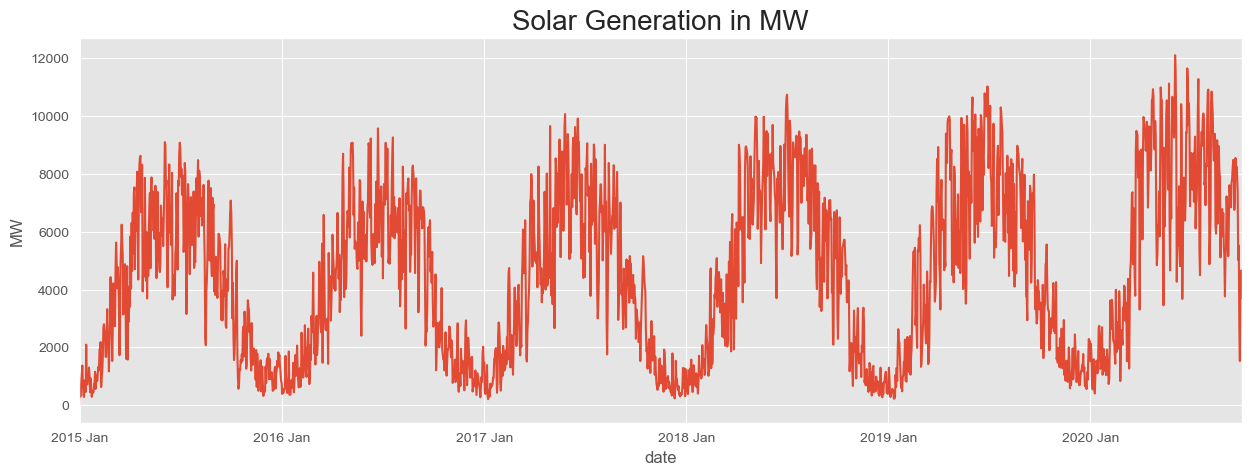

In [30]:
# visualize the time time series of solar 
plt.figure(figsize=(15,5))
plt.plot(modified['DE_solar_generation_actual'])
plt.title('Solar Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

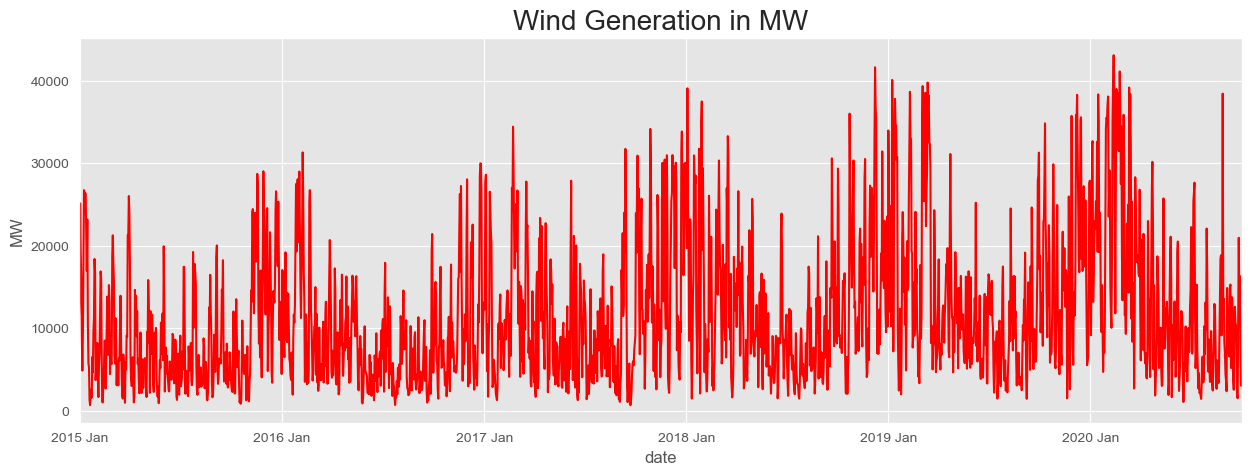

In [31]:
# Do the same thing for the wind data
plt.figure(figsize=(15,5))
plt.plot(modified['DE_wind_generation_actual'], c='red')
plt.title('Wind Generation in MW', fontsize=20)
plt.ylabel('MW')
plt.xlabel('date')
ax = plt.gca()

ax.autoscale(enable=True, axis='x', tight=True)
ax.xaxis.set_major_formatter(DateFormatter("%Y %b"))
plt.show()

In [32]:
# Lets check out some basic statistics for the data
modified.describe()

DE_solar_generation_actual  DE_wind_generation_actual
count                 2101.000000                2101.000000
mean                  4557.518582               11556.499028
std                   2903.978814                8410.922186
min                      0.000000                 686.750000
25%                   1763.458333                5182.708333
50%                   4484.958333                9116.208333
75%                   6916.333333               15759.125000
max                  12101.208333               43086.875000

The mean is much higher for wind and that is because wind produces much more electricity than solar in Germany. They both have very high standard deviations.

#MACHINE LEARNING ALOGORITHMS 

##Train-Test-Split

In [33]:
df.head()

cet_cest_timestamp  \
utc_timestamp                                  
2014-12-31 23:00:00+00:00               None   
2015-01-01 00:00:00+00:00               None   
2015-01-01 01:00:00+00:00               None   
2015-01-01 02:00:00+00:00               None   
2015-01-01 03:00:00+00:00               None   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2015-01-01 00:00:00+00:00                               39723.0   
2015-01-01 01:00:00+00:00                               38813.0   
2015-01-01 02:00:00+00:00                               38490.0   
2015-01-01 03:00:00+00:00                               38644.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         0.0   
2015-01-01 00:00:00+00:00            37248.0                         0.0   
2015-01-01 01:00:00+00:00            37248.0                         0.0   
2015-01-01 02:00:00+00:00            37248.0                         0.0   
2015-01-01 03:00:00+00:00            37248.0                         0.0   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               NaN           27913.0   
2015-01-01 00:00:00+00:00               NaN           27913.0   
2015-01-01 01:00:00+00:00               NaN           27913.0   
2015-01-01 02:00:00+00:00               NaN           27913.0   
2015-01-01 03:00:00+00:00               NaN           27913.0   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00                    11556.0              NaN   
2015-01-01 00:00:00+00:00                    11556.0           0.3171   
2015-01-01 01:00:00+00:00                    11556.0           0.3244   
2015-01-01 02:00:00+00:00                    11556.0           0.3249   
2015-01-01 03:00:00+00:00                    11556.0           0.3283   

                           DE_wind_offshore_capacity  \
utc_timestamp                                          
2014-12-31 23:00:00+00:00                      667.0   
2015-01-01 00:00:00+00:00                      667.0   
2015-01-01 01:00:00+00:00                      667.0   
2015-01-01 02:00:00+00:00                      667.0   
2015-01-01 03:00:00+00:00                      667.0   

                           DE_wind_offshore_generation_actual  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                               517.0   
2015-01-01 01:00:00+00:00                               514.0   
2015-01-01 02:00:00+00:00                               518.0   
2015-01-01 03:00:00+00:00                               520.0   

                           DE_wind_offshore_profile  DE_wind_onshore_capacity  \
utc_timestamp                                                                   
2014-12-31 23:00:00+00:00                       NaN                   27246.0   
2015-01-01 00:00:00+00:00                    0.7744                   27246.0   
2015-01-01 01:00:00+00:00                    0.7710                   27246.0   
2015-01-

In [34]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [35]:
df.fillna(0, inplace=True)

In [36]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(df['DE_solar_profile'], df['DE_solar_generation_actual'],test_size = 0.2, random_state = None)

In [37]:
X1_train=np.array(X1_train).reshape(-1,1)
X1_test=np.array(X1_test).reshape(-1,1)

In [38]:
X1_train

array([[0.3727],
       [0.    ],
       [0.    ],
       ...,
       [0.0157],
       [0.    ],
       [0.    ]])

In [39]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df['DE_wind_profile'], df['DE_wind_generation_actual'],test_size = 0.2, random_state = None)

In [ ]:
# For Wind Energy
X2_train=np.array(X2_train).reshape(-1,1)
X2_test=np.array(X2_test).reshape(-1,1)

In [41]:
X2_train

array([[0.9162],
       [0.2608],
       [0.0266],
       ...,
       [0.4023],
       [0.1607],
       [0.2093]])

##Lasso Regression

In [42]:
df.head()

cet_cest_timestamp  \
utc_timestamp                                  
2014-12-31 23:00:00+00:00                  0   
2015-01-01 00:00:00+00:00                  0   
2015-01-01 01:00:00+00:00                  0   
2015-01-01 02:00:00+00:00                  0   
2015-01-01 03:00:00+00:00                  0   

                           DE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 0.0   
2015-01-01 00:00:00+00:00                             41151.0   
2015-01-01 01:00:00+00:00                             40135.0   
2015-01-01 02:00:00+00:00                             39106.0   
2015-01-01 03:00:00+00:00                             38765.0   

                           DE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   0.0   
2015-01-01 00:00:00+00:00                               39723.0   
2015-01-01 01:00:00+00:00                               38813.0   
2015-01-01 02:00:00+00:00                               38490.0   
2015-01-01 03:00:00+00:00                               38644.0   

                           DE_solar_capacity  DE_solar_generation_actual  \
utc_timestamp                                                              
2014-12-31 23:00:00+00:00            37248.0                         0.0   
2015-01-01 00:00:00+00:00            37248.0                         0.0   
2015-01-01 01:00:00+00:00            37248.0                         0.0   
2015-01-01 02:00:00+00:00            37248.0                         0.0   
2015-01-01 03:00:00+00:00            37248.0                         0.0   

                           DE_solar_profile  DE_wind_capacity  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00               0.0           27913.0   
2015-01-01 00:00:00+00:00               0.0           27913.0   
2015-01-01 01:00:00+00:00               0.0           27913.0   
2015-01-01 02:00:00+00:00               0.0           27913.0   
2015-01-01 03:00:00+00:00               0.0           27913.0   

                           DE_wind_generation_actual  DE_wind_profile  \
utc_timestamp                                                           
2014-12-31 23:00:00+00:00                    11556.0           0.0000   
2015-01-01 00:00:00+00:00                    11556.0           0.3171   
2015-01-01 01:00:00+00:00                    11556.0           0.3244   
2015-01-01 02:00:00+00:00                    11556.0           0.3249   
2015-01-01 03:00:00+00:00                    11556.0           0.3283   

                           DE_wind_offshore_capacity  \
utc_timestamp                                          
2014-12-31 23:00:00+00:00                      667.0   
2015-01-01 00:00:00+00:00                      667.0   
2015-01-01 01:00:00+00:00                      667.0   
2015-01-01 02:00:00+00:00                      667.0   
2015-01-01 03:00:00+00:00                      667.0   

                           DE_wind_offshore_generation_actual  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 0.0   
2015-01-01 00:00:00+00:00                               517.0   
2015-01-01 01:00:00+00:00                               514.0   
2015-01-01 02:00:00+00:00                               518.0   
2015-01-01 03:00:00+00:00                               520.0   

                           DE_wind_offshore_profile  DE_wind_onshore_capacity  \
utc_timestamp                                                                   
2014-12-31 23:00:00+00:00                    0.0000                   27246.0   
2015-01-01 00:00:00+00:00                    0.7744                   27246.0   
2015-01-01 01:00:00+00:00                    0.7710                   27246.0   
2015-01-

In [43]:
from sklearn.linear_model import Lasso
 
# Train the model
# Solar Energy
lasso = Lasso(alpha = 1)
lasso.fit(X1_train, y1_train)
y1_pred = lasso.predict(X1_test)

In [44]:
from sklearn.linear_model import Lasso
import numpy as np

# Ensure X2_train and X2_test are in the correct shape
X2_train = X2_train.values.reshape(-1, 1) if X2_train.ndim == 1 else X2_train
X2_test = X2_test.values.reshape(-1, 1) if X2_test.ndim == 1 else X2_test

# Wind energy
lasso = Lasso(alpha=1)
lasso.fit(X2_train, y2_train)
y2_pred = lasso.predict(X2_test)


In [45]:
#Hyperparameter tuning - alpha = 2
lasso = Lasso(alpha = 2)
lasso.fit(X1_train, y1_train)
y1_pred2 = lasso.predict(X1_test)

In [46]:
lasso = Lasso(alpha = 2)
lasso.fit(X2_train, y2_train)
y2_pred2 = lasso.predict(X2_test)

###Evaluation Metrics

####Mean Squared Error

In [ ]:
#alpha = 1
from sklearn.metrics import mean_squared_error
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred))

Solar MSE =  13241734.418248016


In [48]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred))

Wind MSE =  39972864.69863766


In [49]:
#alpha = 2
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred2))

Solar MSE =  13242019.252079917


In [50]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred2))

Wind MSE =  39972378.67519873


####Mean Absolute Error

In [51]:
from sklearn.metrics import mean_absolute_error
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred))

Solar MAE =  1742.4559988540004


In [52]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred))

Wind MAE =  4100.4124832344


In [53]:
#alpha = 2
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred2))

Solar MAE =  1743.971226003198


In [54]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred2))

Wind MAE =  4101.369156248356


####Root Mean Squared Error

In [55]:
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

Solar RMSE =  3638.919402549061


In [56]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  6322.409722458491


In [ ]:
#alpha = 2
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

Solar RMSE =  3638.958539483504


In [58]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  6322.409722458491


####R Squared

In [59]:
from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.7158560558769835


In [60]:
r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.5121440790265563


In [61]:
#alpha = 2
r2_solar = r2_score(y1_test,y1_pred2)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.7158499438522397


In [62]:
r2_wind = r2_score(y2_test,y2_pred2)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.5121500107858685


###Plot

In [63]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#RIDGE REGRESSION

In [ ]:
from sklearn.linear_model import Ridge
 
# Train the model
ridgeSolar = Ridge(alpha = 1)
ridgeSolar.fit(X1_train, y1_train)
y1_pred = ridgeSolar.predict(X1_test)

In [ ]:
ridgeWind = Ridge(alpha = 1)
ridgeWind.fit(X2_train, y2_train)
y2_pred = ridgeSolar.predict(X2_test)

In [66]:
#Hyperparameter tuning - alpha = 2
ridgeSolar = Ridge(alpha = 2)
ridgeSolar.fit(X1_train, y1_train)
y1_pred2 = ridgeSolar.predict(X1_test)

In [67]:
ridgeWind = Ridge(alpha = 2)
ridgeWind.fit(X2_train, y2_train)
y2_pred2 = ridgeSolar.predict(X2_test)

##Evaluation Metrics

###Mean Squared Error

In [68]:
from sklearn.metrics import mean_squared_error
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred))

Solar MSE =  13241725.218866702


In [69]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred))

Wind MSE =  45032432.88500588


In [70]:
#alpha = 2
print("Solar MSE = ",mean_squared_error(y1_test,y1_pred2))

Solar MSE =  13241993.425300034


In [71]:
print("Wind MSE = ",mean_squared_error(y2_test,y2_pred2))

Wind MSE =  45007347.973381415


###Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred))

Solar MAE =  1742.3978555548454


In [ ]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred))

Wind MAE =  3513.3077298932967


In [ ]:
#alpha = 2
print("Solar MAE = ",mean_absolute_error(y1_test,y1_pred2))

Solar MAE =  1743.8506329615109


In [ ]:
print("Wind MAE = ",mean_absolute_error(y2_test,y2_pred2))

Wind MAE =  3512.2584095792004


###Root Mean Squared Error

In [ ]:
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred)))

Solar RMSE =  3638.9181385223137


In [ ]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred)))

Wind RMSE =  6710.6209016011235


In [78]:
#alpha = 2
print("Solar RMSE = ",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

Solar RMSE =  3638.9549908318504


In [ ]:
print("Wind RMSE = ",np.sqrt(mean_squared_error(y2_test,y2_pred2)))

Wind RMSE =  6708.751595742789


###R Squared

In [ ]:
from sklearn.metrics import r2_score
r2_solar = r2_score(y1_test,y1_pred)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.7158562532792578


In [ ]:
r2_wind = r2_score(y2_test,y2_pred)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.4503936812029864


In [ ]:
#alpha = 2
r2_solar = r2_score(y1_test,y1_pred2)
print("Solar R2 = ",r2_solar)

Solar R2 =  0.7158504980487572


In [ ]:
r2_wind = r2_score(y2_test,y2_pred2)
print("Wind R2 = ",r2_wind)

Wind R2 =  0.45069983445858497


###Plot

In [84]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

#DECISION TREE

In [85]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=0)

In [86]:
y1_pred = regressor.predict(X1_test)
  
# print the predicted price
y1_test


utc_timestamp
2020-02-17 18:00:00+00:00        0.0
2019-11-07 08:00:00+00:00     6913.0
2018-01-21 01:00:00+00:00        0.0
2017-09-22 11:00:00+00:00    17079.0
2018-09-13 12:00:00+00:00    11589.0
                              ...   
2019-07-29 09:00:00+00:00    13546.0
2019-06-15 04:00:00+00:00     1606.0
2016-04-27 10:00:00+00:00    12493.0
2018-04-16 09:00:00+00:00    12182.0
2018-08-23 07:00:00+00:00    12281.0
Name: DE_solar_generation_actual, Length: 10081, dtype: float64

In [87]:
y1_pred

array([ 1618.57631566,  5755.625     ,  1618.57631566, ...,
       14055.75      , 10693.        , 10425.5       ])

In [88]:
#from sklearn.model_selection import cross_val_score 
#cross_val_score(regressor, X1_train, y1_train, cv=50)

In [89]:
#for wind energy
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=0)

In [90]:
y2_pred = regressor.predict(X2_test)
  
# print the predicted price
y2_test

utc_timestamp
2016-02-11 18:00:00+00:00     8845.0
2016-03-29 04:00:00+00:00    20167.0
2015-03-09 11:00:00+00:00      347.0
2020-04-14 05:00:00+00:00    22138.0
2015-12-30 10:00:00+00:00    11069.0
                              ...   
2019-05-04 15:00:00+00:00    15289.0
2016-06-11 06:00:00+00:00     1163.0
2015-04-18 06:00:00+00:00     1862.0
2019-06-14 14:00:00+00:00     6343.0
2015-04-03 18:00:00+00:00     3593.0
Name: DE_wind_generation_actual, Length: 10081, dtype: float64

In [91]:
y2_pred

array([10194.5       , 24449.4       ,   408.5       , ...,
        2706.        ,  5152.45454545,  4313.33333333])

In [92]:
#from sklearn.model_selection import cross_val_score 
#cross_val_score(regressor, X2_train, y2_train, cv=50)

In [ ]:
from sklearn.metrics import r2_score

In [94]:
r2_score(y1_pred, y1_test)

0.6135661451240355

In [95]:
r2_score(y2_pred, y2_test)

0.6294146068620222

In [96]:
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
error = mae(y1_test, y1_pred)
print(error)

1761.6000313261156


In [98]:
error = mae(y2_test, y2_pred)
print(error)

2883.7238877018212


In [ ]:
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(y1_test, y1_pred)
print(MSE)

13184776.015277153


In [ ]:
from sklearn.metrics import mean_squared_error
  
MSE = mean_squared_error(y2_test, y2_pred)
print(MSE)

24034463.412778165


In [ ]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred)))

RMSE 3631.0846885300202


In [ ]:
#root mean squared error for wind
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred)))

RMSE 4902.495631082007


Hyperparameter tuning with random state=1

In [103]:
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 1) 
  
# fit the regressor with X and Y data
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor(random_state=1)

In [104]:
y1_pred2 = regressor.predict(X1_test)

In [105]:
#for wind energy
regressor.fit(X2_train, y2_train)

DecisionTreeRegressor(random_state=1)

In [106]:
y2_pred2 = regressor.predict(X2_test)

In [107]:
r2_score(y1_pred2, y1_test)

0.6135661451240355

In [ ]:
r2_score(y2_pred2, y2_test)

0.6294146068620222

In [ ]:
MSE = mean_squared_error(y1_test, y1_pred2)
print(MSE)

13184776.015277153


In [110]:
MSE = mean_squared_error(y2_test, y2_pred2)
print(MSE)

24034463.412778165


In [111]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y1_test,y1_pred2)))

RMSE 3631.0846885300202


In [112]:
#root mean squared error for solar
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred2)))

RMSE 4902.495631082007


In [ ]:
error = mae(y1_test, y1_pred2)
print(error)

1761.6000313261156


In [ ]:
error = mae(y2_test, y2_pred2)
print(error)

2883.7238877018212


In [115]:
g=plt.plot(y1_test - y1_pred,marker='o',linestyle='')

LSTM MODEL

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Function to preprocess the data for RNN
def preprocess_rnn_data(df, feature_column, target_column, time_steps=24):
    data = df[[feature_column, target_column]].values
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    
    X, y = [], []
    for i in range(len(scaled_data) - time_steps):
        X.append(scaled_data[i:i + time_steps])
        y.append(scaled_data[i + time_steps, 1])
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y, scaler

In [118]:
# Preprocess data for solar generation
X_solar, y_solar, solar_scaler = preprocess_rnn_data(df, 'DE_solar_profile', 'DE_solar_generation_actual')

In [119]:
# Preprocess data for wind generation
X_wind, y_wind, wind_scaler = preprocess_rnn_data(df, 'DE_wind_profile', 'DE_wind_generation_actual')

In [120]:
# Split the data into training and testing sets
X_solar_train, X_solar_test, y_solar_train, y_solar_test = train_test_split(X_solar, y_solar, test_size=0.2, random_state=42)
X_wind_train, X_wind_test, y_wind_train, y_wind_test = train_test_split(X_wind, y_wind, test_size=0.2, random_state=42)

In [121]:
# Build the RNN model for solar generation
model_solar = Sequential()
model_solar.add(LSTM(units=50, return_sequences=True, input_shape=(X_solar_train.shape[1], X_solar_train.shape[2])))
model_solar.add(LSTM(units=50))
model_solar.add(Dense(1))
model_solar.compile(optimizer='adam', loss='mean_squared_error')

In [122]:
# Train the model
history_solar = model_solar.fit(X_solar_train, y_solar_train, epochs=10, batch_size=32, validation_split=0.1)



Epoch 1/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.0091 - val_loss: 4.8040e-04
Epoch 2/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 4.1494e-04 - val_loss: 2.0969e-04
Epoch 3/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.8864e-04 - val_loss: 1.1815e-04
Epoch 4/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.4029e-04 - val_loss: 1.4716e-04
Epoch 5/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.3916e-04 - val_loss: 1.2717e-04
Epoch 6/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 1.2510e-04 - val_loss: 1.0761e-04
Epoch 7/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 1.1605e-04 - val_loss: 9.8413e-05
Epoch 8/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.0883e-04 - val_loss: 1.2402e-04
Epoch 9/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.2682e-04 - val_loss: 1.0417e-04
Epoch 10/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 1.0239e-04 - val_loss: 1.4741e-04


In [123]:
# Evaluate the model
solar_test_loss = model_solar.evaluate(X_solar_test, y_solar_test)

315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5546e-04


In [124]:
# Make predictions
y_solar_pred = model_solar.predict(X_solar_test)
y_solar_pred = solar_scaler.inverse_transform(np.concatenate((np.zeros((y_solar_pred.shape[0], 1)), y_solar_pred), axis=1))[:, 1]

315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [125]:
# Build the RNN model for wind generation
model_wind = Sequential()
model_wind.add(LSTM(units=50, return_sequences=True, input_shape=(X_wind_train.shape[1], X_wind_train.shape[2])))
model_wind.add(LSTM(units=50))
model_wind.add(Dense(1))
model_wind.compile(optimizer='adam', loss='mean_squared_error')

In [126]:
# Train the model
history_wind = model_wind.fit(X_wind_train, y_wind_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - loss: 0.0051 - val_loss: 4.0584e-04
Epoch 2/5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 3.1947e-04 - val_loss: 1.7724e-04
Epoch 3/5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 2.1538e-04 - val_loss: 2.8758e-04
Epoch 4/5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 2.1867e-04 - val_loss: 1.6879e-04
Epoch 5/5
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - loss: 2.1056e-04 - val_loss: 2.1356e-04


In [127]:

# Evaluate the model
wind_test_loss = model_wind.evaluate(X_wind_test, y_wind_test)


315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.1354e-04


In [128]:

# Make predictions
y_wind_pred = model_wind.predict(X_wind_test)
y_wind_pred = wind_scaler.inverse_transform(np.concatenate((np.zeros((y_wind_pred.shape[0], 1)), y_wind_pred), axis=1))[:, 1]


315/315 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


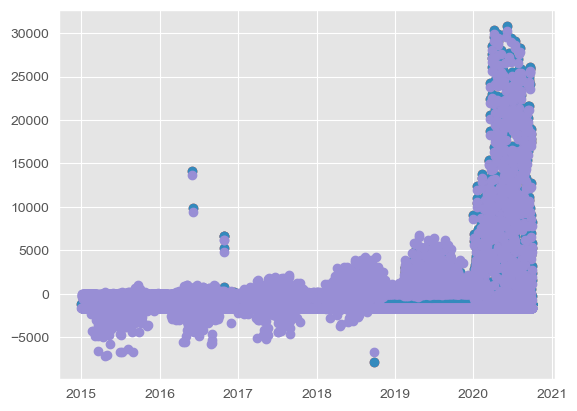

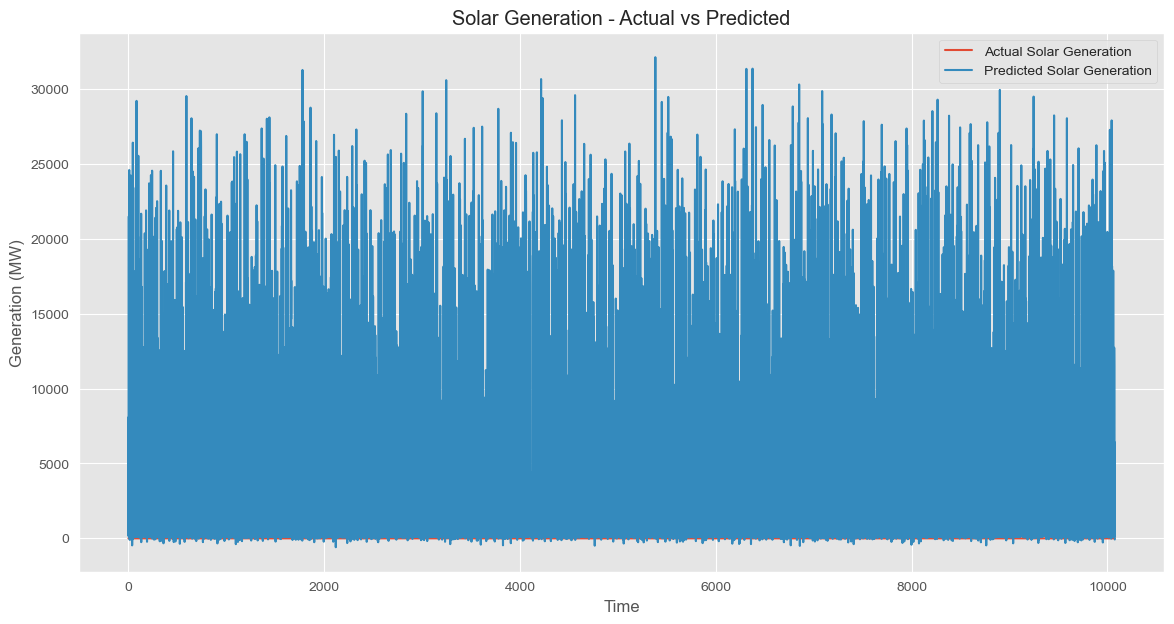

In [129]:

# Plotting predictions vs actual values for solar
plt.figure(figsize=(14, 7))
plt.plot(y_solar_test, label='Actual Solar Generation')
plt.plot(y_solar_pred, label='Predicted Solar Generation')
plt.title('Solar Generation - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.legend()
plt.show()


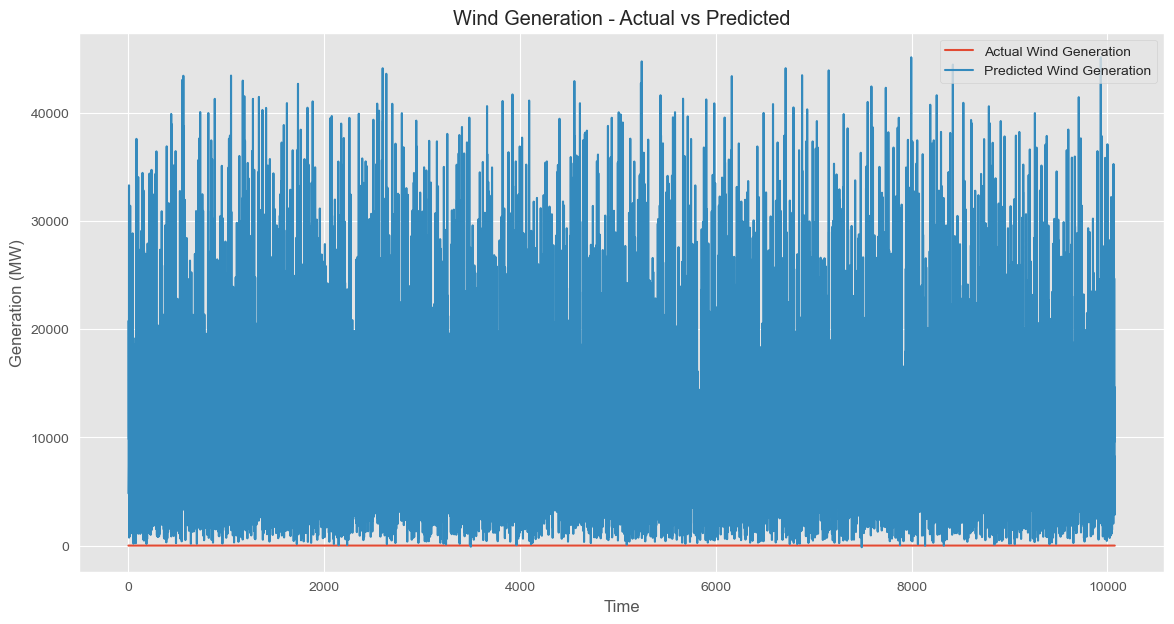

In [130]:

# Plotting predictions vs actual values for wind
plt.figure(figsize=(14, 7))
plt.plot(y_wind_test, label='Actual Wind Generation')
plt.plot(y_wind_pred, label='Predicted Wind Generation')
plt.title('Wind Generation - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Generation (MW)')
plt.legend()
plt.show()

In [131]:

from lime.lime_tabular import LimeTabularExplainer


In [132]:

# Assuming your data is already preprocessed and split into X_train, X_test, y_train, y_test

# Create a LIME explainer
explainer = LimeTabularExplainer(
    training_data=np.array(X1_train),  # Use the training data
    feature_names=['DE_solar_profile'],  # Name of the feature(s)
    class_names=['DE_solar_generation_actual'],  # Name of the target variable
    mode='regression'
)


In [133]:

# Pick an instance from the test set to explain
i = 5  # You can pick any index of a sample from the test set
instance = X1_test[i].reshape(1, -1)


In [134]:

# Explain the instance prediction with Lasso model
exp = explainer.explain_instance(
    data_row=instance.flatten(),
    predict_fn=lasso.predict
)


In [135]:

# Display the explanation
exp.show_in_notebook(show_table=True)


In [136]:

# Similarly, you can do it for the wind model
explainer_wind = LimeTabularExplainer(
    training_data=np.array(X2_train),
    feature_names=['DE_wind_profile'],
    class_names=['DE_wind_generation_actual'],
    mode='regression'
)

instance_wind = X2_test[5].reshape(1, -1)
exp_wind = explainer_wind.explain_instance(
    data_row=instance_wind.flatten(),
    predict_fn=lasso.predict
)

exp_wind.show_in_notebook(show_table=True)


In [137]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Flatten the training data for LIME
X_solar_train_flat = X_solar_train.reshape(X_solar_train.shape[0], -1)

# Create a LIME explainer with the flattened data
explainer_lstm_solar = LimeTabularExplainer(
    training_data=X_solar_train_flat,
    mode='regression',
    feature_names=[f"t{j}_t-{i}" for i in range(X_solar_train.shape[1]) for j in range(X_solar_train.shape[2])],
    discretize_continuous=True
)

# Pick an instance from the test set
i = 0  # Index of the instance
instance_lstm_solar = X_solar_test[i].reshape(1, -1)  # Flatten the instance

# Explain the instance
exp_lstm_solar = explainer_lstm_solar.explain_instance(
    data_row=instance_lstm_solar.flatten(),  # Flatten data_row
    predict_fn=lambda x: model_solar.predict(x.reshape(-1, X_solar_train.shape[1], X_solar_train.shape[2])).flatten()
)

# Display the explanation
exp_lstm_solar.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [138]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Flatten the training data for LIME (Wind)
X_wind_train_flat = X_wind_train.reshape(X_wind_train.shape[0], -1)

# Create a LIME explainer with the flattened data (Wind)
explainer_lstm_wind = LimeTabularExplainer(
    training_data=X_wind_train_flat,
    mode='regression',
    feature_names=[f"t{j}_t-{i}" for i in range(X_wind_train.shape[1]) for j in range(X_wind_train.shape[2])],
    discretize_continuous=True
)

# Pick an instance from the test set (Wind)
i = 0  # Index of the instance
instance_lstm_wind = X_wind_test[i].reshape(1, -1)  # Flatten the instance

# Explain the instance (Wind)
exp_lstm_wind = explainer_lstm_wind.explain_instance(
    data_row=instance_lstm_wind.flatten(),  # Flatten data_row
    predict_fn=lambda x: model_wind.predict(x.reshape(-1, X_wind_train.shape[1], X_wind_train.shape[2])).flatten()
)

# Display the explanation (Wind)
exp_lstm_wind.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
